#               VAHAN VEHICLE REGISTRATION BY FUEL TYPE

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [4]:
# Load dataset
df = pd.read_csv("E:\\vahan-vehicle-registrations-by-fuel-type.csv")
print("Columns:", df.columns.tolist())


Columns: ['id', 'date', 'state_name', 'state_code', 'office_name', 'office_code', 'fuel_type', 'category', 'registrations']


In [5]:
# Convert date to datetime and extract year
df['date'] = pd.to_datetime(df['date'], errors='coerce')
df['Year'] = df['date'].dt.year
#basic info
print("Shape of the dataset:", df.shape)
print("\nSummary:\n", df.describe())
print("\nInfo:\n")
print(df.info())


Shape of the dataset: (418372, 10)

Summary:
                   id                           date     state_code  \
count  418372.000000                         418372  418372.000000   
mean   209185.500000  2021-11-28 05:07:25.899821056      19.161062   
min         0.000000            2019-01-01 00:00:00       1.000000   
25%    104592.750000            2020-08-01 00:00:00       8.000000   
50%    209185.500000            2022-02-01 00:00:00      21.000000   
75%    313778.250000            2023-05-01 00:00:00      29.000000   
max    418371.000000            2024-05-01 00:00:00      38.000000   
std    120773.737748                            NaN      10.967969   

       registrations           Year  
count   4.183720e+05  418372.000000  
mean    1.844822e+03    2021.475072  
min     1.000000e+00    2019.000000  
25%     5.000000e+00    2020.000000  
50%     2.600000e+01    2022.000000  
75%     1.700000e+02    2023.000000  
max     1.598869e+07    2024.000000  
std     5.581984e+0

In [6]:
# Preview
print("\nTop 15 Rows:\n", df.head(15))
print("\nBottom 15 Rows:\n", df.tail(15))




Top 15 Rows:
     id       date                   state_name  state_code     office_name  \
0    0 2020-04-01  Andaman And Nicobar Islands          35  Port Blair Dto   
1    1 2020-04-01  Andaman And Nicobar Islands          35  Port Blair Dto   
2    2 2020-08-01  Andaman And Nicobar Islands          35  Port Blair Dto   
3    3 2020-12-01  Andaman And Nicobar Islands          35  Port Blair Dto   
4    4 2020-12-01  Andaman And Nicobar Islands          35  Port Blair Dto   
5    5 2020-12-01  Andaman And Nicobar Islands          35  Port Blair Dto   
6    6 2020-02-01  Andaman And Nicobar Islands          35  Port Blair Dto   
7    7 2020-02-01  Andaman And Nicobar Islands          35  Port Blair Dto   
8    8 2020-02-01  Andaman And Nicobar Islands          35  Port Blair Dto   
9    9 2020-01-01  Andaman And Nicobar Islands          35  Port Blair Dto   
10  10 2020-01-01  Andaman And Nicobar Islands          35  Port Blair Dto   
11  11 2020-07-01  Andaman And Nicobar Islands   

In [7]:

# Drop missing values in essential columns
essential = ['fuel_type', 'Year', 'state_name', 'registrations']
df.dropna(subset=essential, inplace=True)


In [8]:
# Ensure numeric type
df['registrations'] = pd.to_numeric(df['registrations'], errors='coerce')
df.dropna(subset=['registrations'], inplace=True)


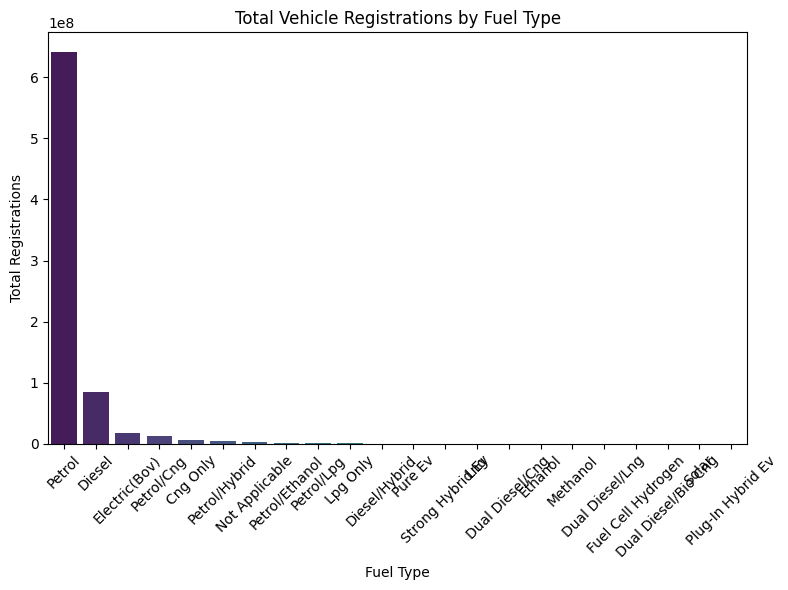

In [9]:
# ---- PLOT 1: Total Registrations by Fuel Type ----
plt.figure(figsize=(8, 6))
fuel_counts = df.groupby('fuel_type')['registrations'].sum().sort_values(ascending=False)
sns.barplot(x=fuel_counts.index, y=fuel_counts.values, hue=fuel_counts.index, palette='viridis', legend=False)
plt.title("Total Vehicle Registrations by Fuel Type")
plt.xlabel("Fuel Type")
plt.ylabel("Total Registrations")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


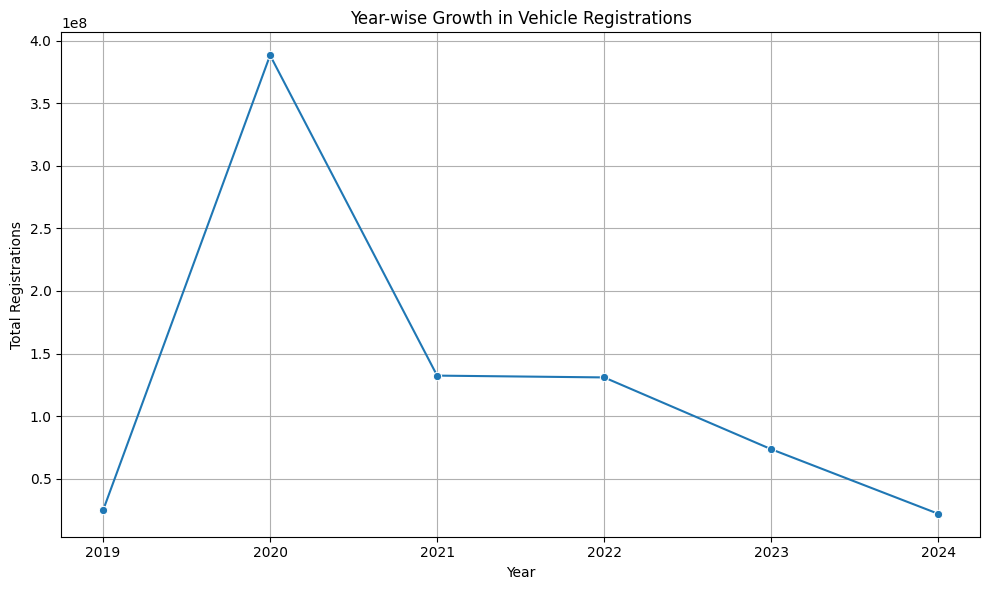

In [10]:
# ---- PLOT 2: Year-wise Growth ----
yearly = df.groupby('Year')['registrations'].sum()
plt.figure(figsize=(10, 6))
sns.lineplot(x=yearly.index, y=yearly.values, marker='o')
plt.title("Year-wise Growth in Vehicle Registrations")
plt.xlabel("Year")
plt.ylabel("Total Registrations")
plt.grid(True)
plt.tight_layout()
plt.show()


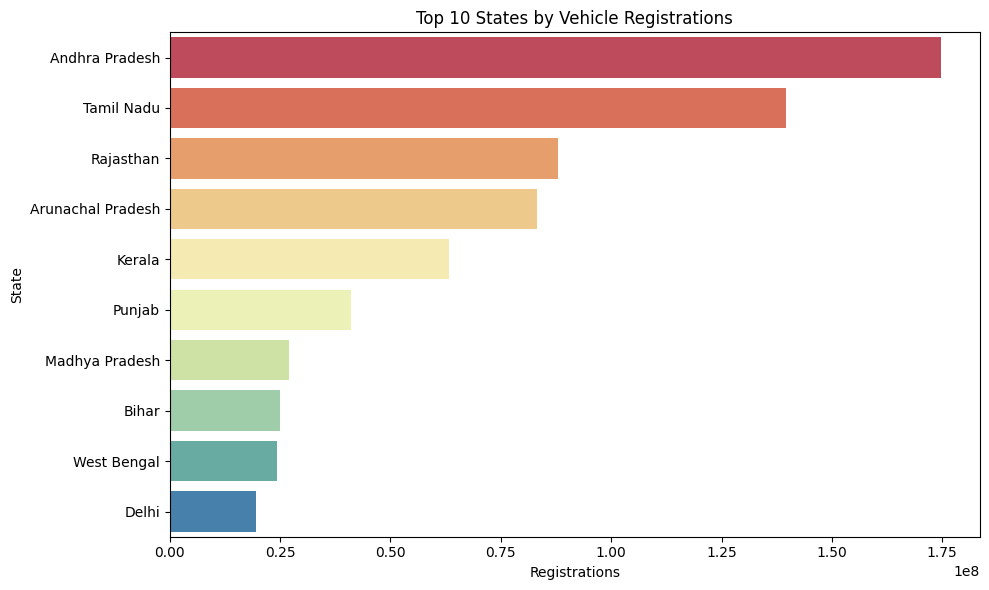

In [11]:
# ---- PLOT 3: Top 10 States ----
top_states = df.groupby('state_name')['registrations'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_states.values, y=top_states.index, hue=top_states.index, palette="Spectral", legend=False)
plt.title("Top 10 States by Vehicle Registrations")
plt.xlabel("Registrations")
plt.ylabel("State")
plt.tight_layout()
plt.show()


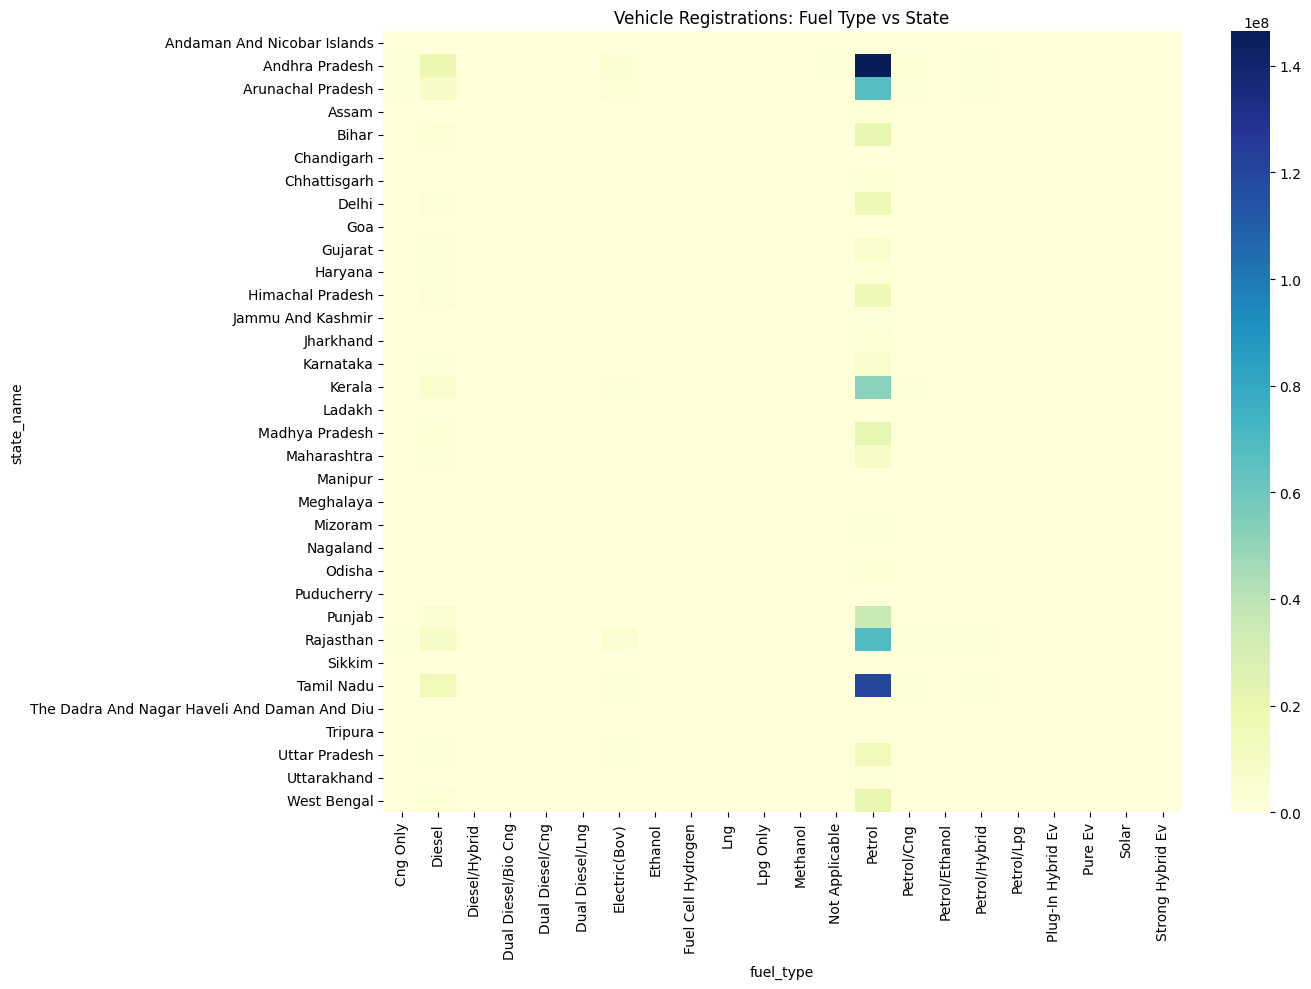

In [12]:
# ---- PLOT 4: Fuel Type per State (Heatmap) ----
pivot1 = df.pivot_table(index='state_name', columns='fuel_type', values='registrations', aggfunc='sum', fill_value=0)
plt.figure(figsize=(14, 10))
sns.heatmap(pivot1, cmap='YlGnBu')
plt.title("Vehicle Registrations: Fuel Type vs State")
plt.tight_layout()
plt.show()


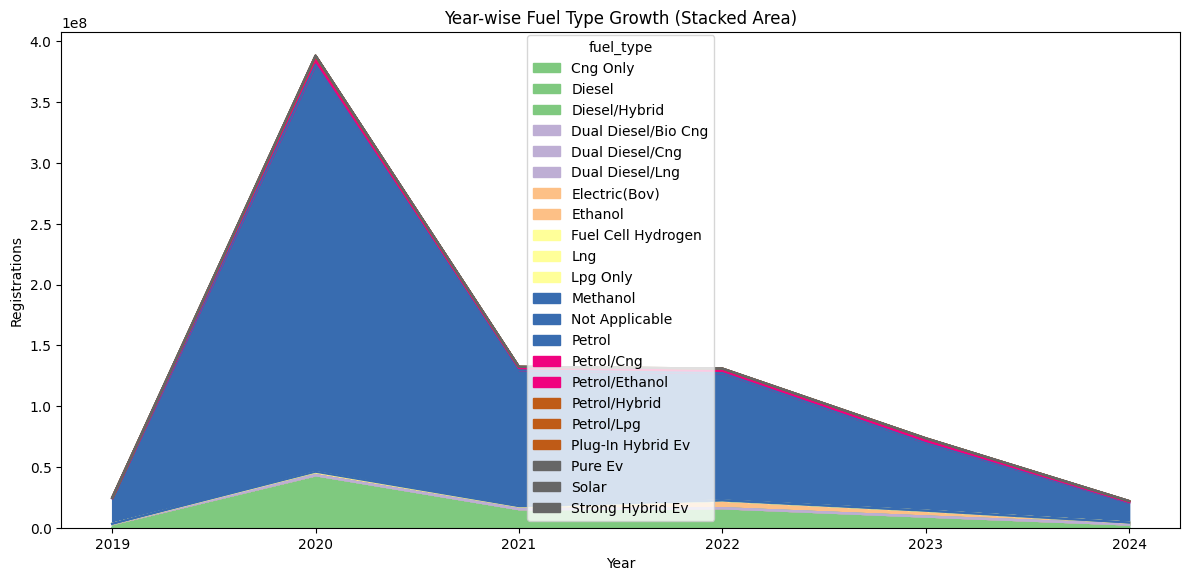

In [13]:
# ---- PLOT 5: Year-wise Stacked Area Plot by Fuel ----
area_df = df.pivot_table(index='Year', columns='fuel_type', values='registrations', aggfunc='sum', fill_value=0)
area_df.plot.area(figsize=(12, 6), colormap='Accent', stacked=True)
plt.title("Year-wise Fuel Type Growth (Stacked Area)")
plt.xlabel("Year")
plt.ylabel("Registrations")
plt.tight_layout()
plt.show()


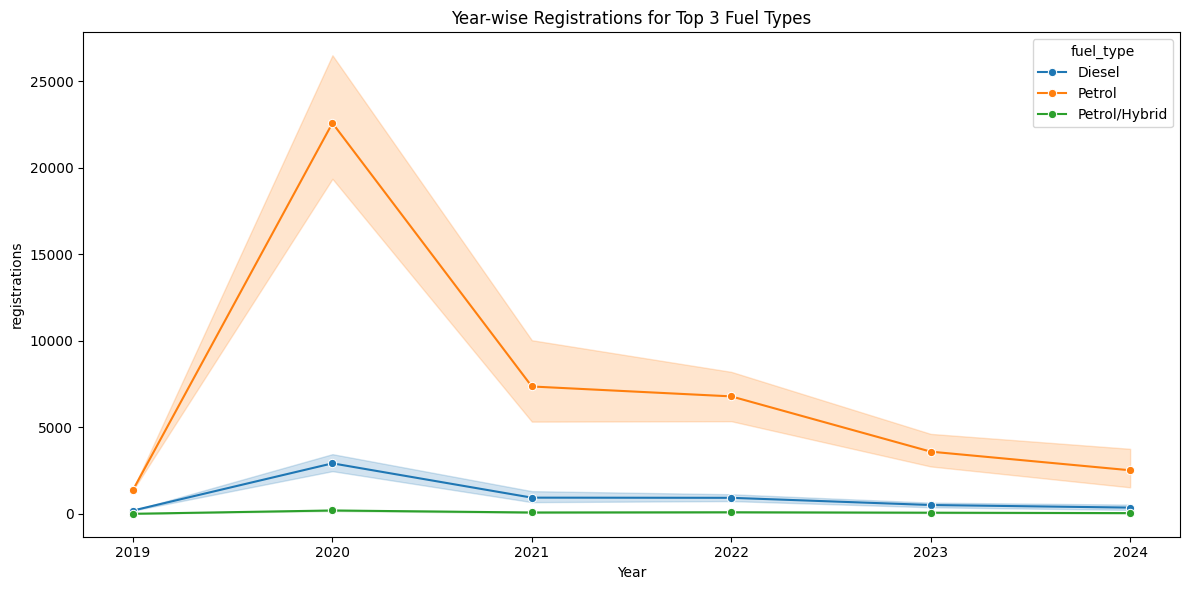

In [14]:
# ---- PLOT 6: Lineplot for Top 3 Fuel Types ----
top_fuels = df['fuel_type'].value_counts().head(3).index
top3_df = df[df['fuel_type'].isin(top_fuels)]
plt.figure(figsize=(12, 6))
sns.lineplot(data=top3_df, x='Year', y='registrations', hue='fuel_type', marker='o')
plt.title("Year-wise Registrations for Top 3 Fuel Types")
plt.tight_layout()
plt.show()


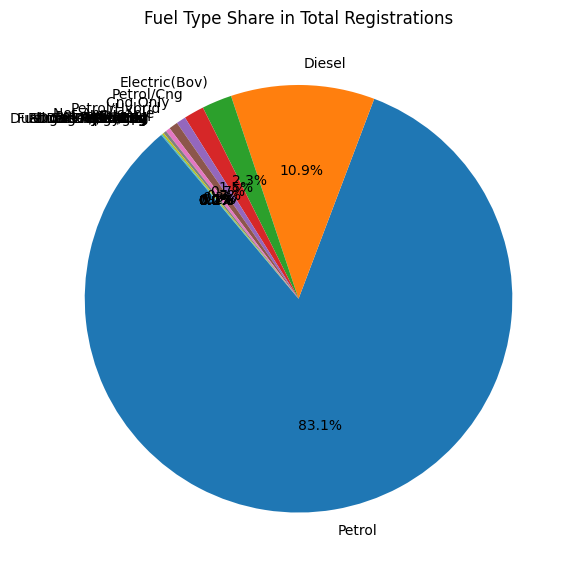

In [15]:
# ---- PLOT 7: Pie Chart - Fuel Type Share ----
plt.figure(figsize=(6, 6))
plt.pie(fuel_counts.values, labels=fuel_counts.index, autopct='%1.1f%%', startangle=130)
plt.title("Fuel Type Share in Total Registrations")
plt.tight_layout()
plt.show()


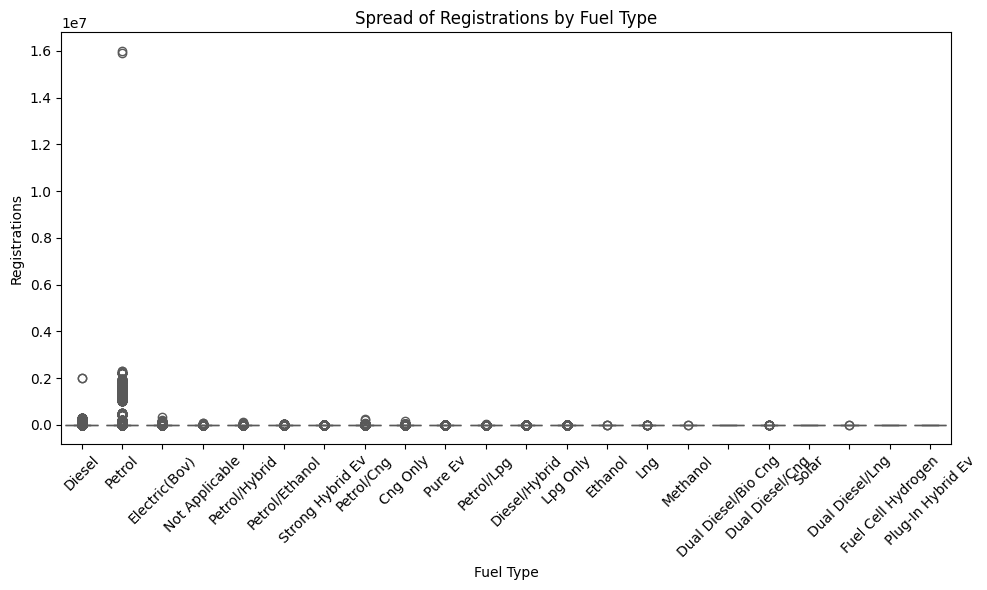

In [16]:
# ---- PLOT 8: Boxplot - Spread of Registrations by Fuel ----
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='fuel_type', y='registrations', hue='fuel_type', palette="Set2", legend=False)
plt.title("Spread of Registrations by Fuel Type")
plt.xlabel("Fuel Type")
plt.ylabel("Registrations")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


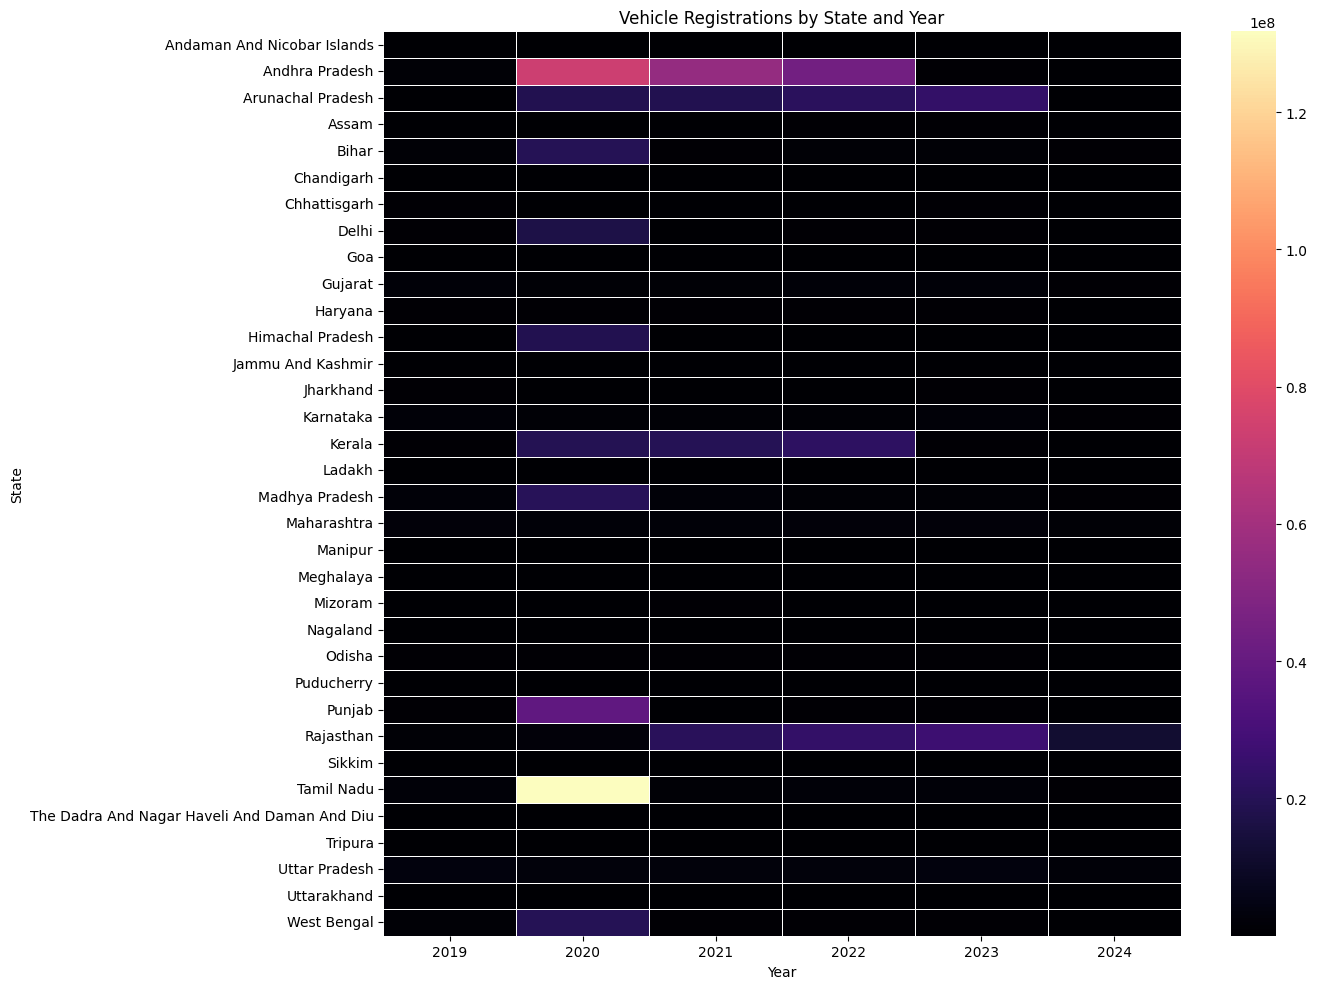

In [17]:
# ---- PLOT 9: State-Year Heatmap ----
pivot2 = df.pivot_table(index='state_name', columns='Year', values='registrations', aggfunc='sum', fill_value=0)
plt.figure(figsize=(14, 10))
sns.heatmap(pivot2, cmap='magma', linewidths=0.5)
plt.title("Vehicle Registrations by State and Year")
plt.xlabel("Year")
plt.ylabel("State")
plt.tight_layout()
plt.show()



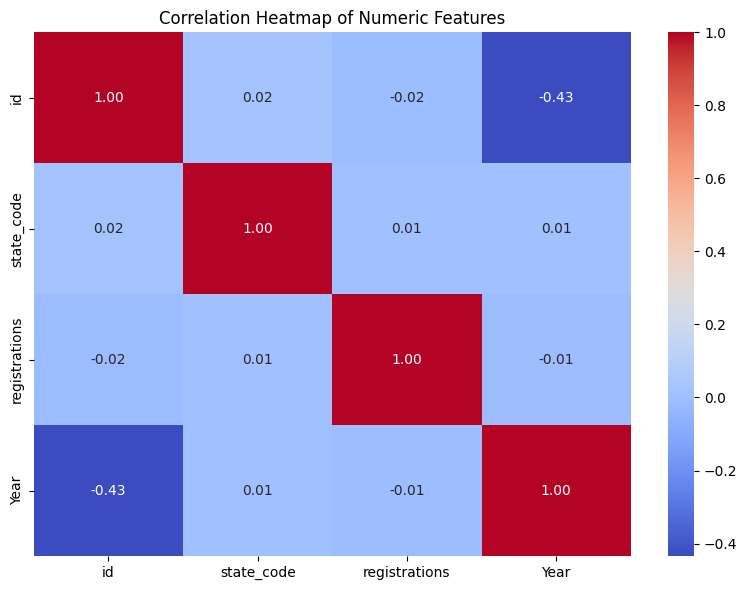

In [18]:
# ---- PLOT 10: Correlation Heatmap ----
numeric_df = df.select_dtypes(include=np.number)
if numeric_df.shape[1] > 1:
    plt.figure(figsize=(8, 6))
    sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
    plt.title("Correlation Heatmap of Numeric Features")
    plt.tight_layout()
    plt.show()
